In [432]:
#In this project, I am going to be taking a look at the players of the 2020 draft and seeing if where
#they went to college has an effect on their NB success. I am determining success by their playtime for
#the 2020 season and their points. I am using two csv files and an API in
#order to gather data for my findings.
#I am also going to be looking at the amount of players drafted from each college over the years,
#to see which colleges have the best beasketball programs.

In [1039]:
#modules I am using
import numpy as np
import requests
import pandas as pd
import seaborn as sb
import matplotlib as mpl
pd.options.display.max_columns = 200

In [434]:
#reading in all of my files
#Players.csv file with player stats and college information
playerStatsDF = pd.read_csv("all_seasons.csv")
playerStatsDF

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,13,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,37,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,39,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,57,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21


<AxesSubplot:>

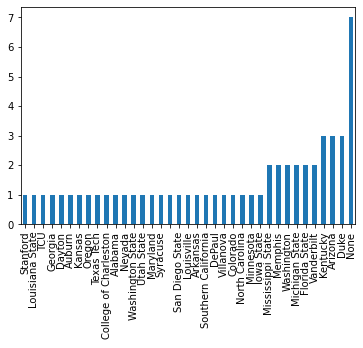

In [436]:
#This graph shows the total amount of players from every college in the NBA from 1996-2020.
collegeCounts2020 = playerStatsDF.query("draft_year == '2020'")["college"].value_counts().sort_values()
collegeCounts2020.plot(kind="bar")

In [437]:
#From this plot I discovered that the most players drafted in 2020 did not come from a college. 
#The second most players was a three way tie between Duke, Arizona, and Kentucky. 
#The plot shows which colleges are producing the most professional players.
#Now I want to see which players perform the best and see if there is a relationship between where
#someone played for college and how successful they are in the NBA.

In [438]:
#Now using the balldontlie API I want to use the player season stats to see which colleges had
#the best performing players once they got to the league.


In [439]:
playerStatsDF.query("draft_year == '2020'").sort_values("college")

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
11242,11242,Jay Scrubb,LAC,20.0,195.58,99.790240,,USA,2020,2,55,4,8.8,3.5,0.3,-2.8,0.022,0.140,0.217,0.458,0.015,2020-21
11583,11583,Kira Lewis Jr.,NOP,20.0,185.42,77.110640,Alabama,USA,2020,1,13,54,6.4,1.3,2.3,0.8,0.012,0.064,0.176,0.477,0.191,2020-21
11162,11162,Zeke Nnaji,DEN,20.0,205.74,108.862080,Arizona,USA,2020,1,22,42,3.2,1.5,0.2,-10.5,0.034,0.129,0.126,0.615,0.037,2020-21
11661,11661,Nico Mannion,GSW,20.0,187.96,86.182480,Arizona,Italy,2020,2,48,30,4.1,1.5,2.3,-9.4,0.016,0.107,0.186,0.487,0.270,2020-21
11605,11605,Josh Green,DAL,20.0,195.58,90.718400,Arizona,Australia,2020,1,18,39,2.6,2.0,0.7,1.9,0.059,0.110,0.112,0.490,0.083,2020-21
11270,11270,Isaiah Joe,PHI,21.0,193.04,74.842680,Arkansas,USA,2020,2,49,41,3.7,0.9,0.5,1.8,0.014,0.083,0.163,0.533,0.072,2020-21
11268,11268,Isaac Okoro,CLE,20.0,195.58,102.058200,Auburn,USA,2020,1,5,67,9.6,3.1,1.9,-8.7,0.031,0.066,0.142,0.514,0.086,2020-21
11189,11189,Grant Riller,CHA,24.0,187.96,86.182480,College of Charleston,USA,2020,2,56,7,2.6,0.1,0.4,-5.4,0.000,0.040,0.220,0.750,0.300,2020-21
11509,11509,Tyler Bey,DAL,23.0,200.66,97.522280,Colorado,USA,2020,2,36,18,1.0,1.1,0.2,-27.0,0.090,0.177,0.143,0.372,0.063,2020-21
11470,11470,Obi Toppin,NYK,23.0,205.74,99.790240,Dayton,USA,2020,1,8,62,4.1,2.2,0.5,2.7,0.037,0.155,0.157,0.574,0.065,2020-21


In [440]:
#This base url is going to be used to find the season averages for each player and compare them to 
#other colleges.
#Using just data from these players first season can give a better idea to how successful the 
#colleges' basketball programs are.
base = "https://www.balldontlie.io/api/v1/"

names2020Draft = []
for player in playerStatsDF.query("draft_year == '2020'").sort_values("college")["player_name"]:
    names2020Draft.append(player.split(" "))
names2020Draft
#Now that I have the last names of every draft pick, I can make requests to find each players playerID
#and then use the ID to find their 2020 season stats. 

[['Jay', 'Scrubb'],
 ['Kira', 'Lewis', 'Jr.'],
 ['Zeke', 'Nnaji'],
 ['Nico', 'Mannion'],
 ['Josh', 'Green'],
 ['Isaiah', 'Joe'],
 ['Isaac', 'Okoro'],
 ['Grant', 'Riller'],
 ['Tyler', 'Bey'],
 ['Obi', 'Toppin'],
 ['Paul', 'Reed'],
 ['Vernon', 'Carey', 'Jr.'],
 ['Tre', 'Jones'],
 ['Cassius', 'Stanley'],
 ['Patrick', 'Williams'],
 ['Devin', 'Vassell'],
 ['Anthony', 'Edwards'],
 ['Tyrese', 'Haliburton'],
 ['Udoka', 'Azubuike'],
 ['Tyrese', 'Maxey'],
 ['Nick', 'Richards'],
 ['Immanuel', 'Quickley'],
 ['Skylar', 'Mays'],
 ['Jordan', 'Nwora'],
 ['Jalen', 'Smith'],
 ['James', 'Wiseman'],
 ['Precious', 'Achiuwa'],
 ['Xavier', 'Tillman'],
 ['Cassius', 'Winston'],
 ['Daniel', 'Oturu'],
 ['Robert', 'Woodard', 'II'],
 ['Reggie', 'Perry'],
 ['Jalen', 'Harris'],
 ['Kenyon', 'Martin', 'Jr.'],
 ['R.J.', 'Hampton'],
 ['LaMelo', 'Ball'],
 ['Aleksej', 'Pokusevski'],
 ['Theo', 'Maledon'],
 ['Killian', 'Hayes'],
 ['Deni', 'Avdija'],
 ['Cole', 'Anthony'],
 ['Payton', 'Pritchard'],
 ['Malachi', 'Flynn'],
 ['O

In [441]:
playerIDs =[]
#idRequests = requests.get("https://www.balldontlie.io/api/v1/players?search=gordon").json()
for name in names2020Draft:
    playerSearchRequest = requests.get("https://www.balldontlie.io/api/v1/players?search=" + name[1]).json()
    for i in playerSearchRequest["data"]:
        #add ID of player to idlist if player first name matches last name( could have multiple lastnames)
        if(i["first_name"] == name[0]):
            playerIDs.append(i["id"])
#Now I have all of the player IDs which I can use to make another request for their 2020 season 
#averages.
playerIDs.remove(1281)
len(playerIDs)

50

In [455]:
playerStats2020 = {}
#made a dictionary to hold the ID and then their stats
#made a request for each ID and get the season average for minutes and points for each player 
for id_ in playerIDs:
    seasonAvgRequest = requests.get("https://www.balldontlie.io/api/v1/season_averages?season=2020&player_ids[]="+str(id_)).json()
    playerStats2020[id_] = [seasonAvgRequest["data"][0]["min"],seasonAvgRequest["data"][0]["pts"]]

In [456]:
#new dictionary containing players names, ids, college, and their averages for 2020 season
cleanedUpDictionary = {"Name":[],"ID":[],"College":[],"AverageMins":[],"AveragePts":[]}
#adding names to list in dictionary
for name in names:
        cleanedUpDictionary["Name"].append(name)
#adding ids
for key in playerStats2020:
    cleanedUpDictionary["ID"].append(key)
#adding their stats to nested lists in dictionary
for mins in playerStats2020:
    cleanedUpDictionary["AverageMins"].append(playerStats2020[mins][0])
for pts in playerStats2020:
    cleanedUpDictionary["AveragePts"].append(playerStats2020[pts][1])
#had to add colleges manually but found an easier solution for this later
#needed to make sure every stat name and college lined up perfectly in new dictionary
cleanedUpDictionary["College"] = ["None","Alabama","Arizona","Arizona","Arizona","Auburn","College of Charleston","Colorado","Dayton","DePaul","Duke","Duke","Florida State","Georgia","Iowa State","Kansas","Kentucky","Kentucky","Kentucky","Lousiana State","Louisville","Memphis","Memphis","Michigan State","Michigan State","Minnesota","Mississippi State","Mississippi State","Nevada","None","None","None","None","None","None","None","Oregon","San Diego State","Southern California","Stanford","Syracuse","TCU","Texas Tech","Utah State","Vanderbilt","Vanderbilt","Villanova","Washington","Washington","Washington State"]
len(cleanedUpDictionary["AveragePts"])

50

In [461]:
#get names of each player to add to list to put in dictionary["Name"]
names= []
for name in names2020Draft:
    playerSearchRequest = requests.get("https://www.balldontlie.io/api/v1/players?search=" + name[1]).json()
    for i in playerSearchRequest["data"]:
        if(i["first_name"] == name[0]):
            names.append(i["first_name"] + " " + i["last_name"])
len(names)
#had to remove this name and id, was causing errors
names.remove("Kenyon Martin Jr.")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [462]:
#made a new data frame with the dictionary I just created
df = pd.DataFrame(cleanedUpDictionary)
df

,Name,ID,College,AverageMins,AveragePts
0,Jay Scrubb,3547280,None,14:01,5.83
1,Kira Lewis Jr.,3547260,Alabama,13:06,4.97
2,Zeke Nnaji,3547268,Arizona,5:55,2.03
3,Nico Mannion,3547261,Arizona,7:44,2.62
4,Josh Green,3547258,Arizona,6:44,1.53
5,Isaac Okoro,3547247,Auburn,32:25,9.64
6,Grant Riller,3547277,College of Charleston,0:54,0.60
7,Tyler Bey,3547265,Colorado,1:34,0.40
8,Obi Toppin,3547243,Dayton,11:00,4.08
9,Paul Reed,3547270,DePaul,3:46,1.87


In [463]:
#Now that I have all of the information I need in one dataframe. I can create graphs to show which 
#colleges have the best players.
#Here is a plot that shows averagepts across the board, it is hard to understand anything from this
#I am going to make it more specific
df.sort_values("AveragePts",ascending = False)

,Name,ID,College,AverageMins,AveragePts
13,Anthony Edwards,3547238,Georgia,32:08,19.33
31,LaMelo Ball,3547239,None,28:47,15.80
14,Tyrese Haliburton,3547245,Iowa State,30:05,12.98
46,Saddiq Bey,3547256,Villanova,26:30,11.90
21,James Wiseman,3547240,Memphis,21:25,11.49
18,Immanuel Quickley,3547269,Kentucky,19:25,11.42
5,Isaac Okoro,3547247,Auburn,32:25,9.64
33,Theo Maledon,3547253,None,25:23,9.40
41,Desmond Bane,3547287,TCU,22:00,9.06
29,Kenyon Martin,3547294,None,21:21,8.38


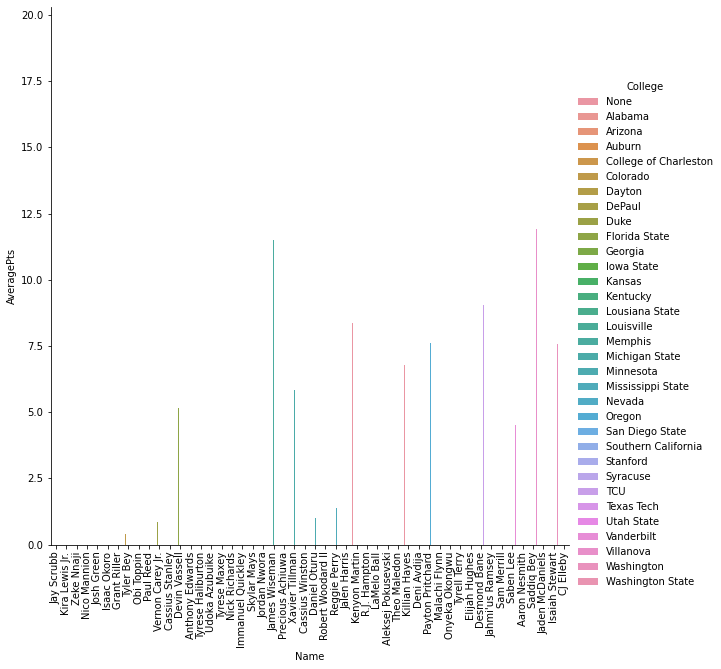

In [464]:
avgPts = df.sort_values("AveragePts",ascending = False)
sb.catplot(x="Name",y="AveragePts",data= df,hue="College",kind="bar",height=8).set_xticklabels(rotation =90)

In [1075]:
#This shows the average points for each player by college. This graph shows that very few
#players have an average above 1pts per game.
#I'm curious whether players who went to college had a better average than those who didnt.


In [466]:
#made a new column that says yes or no depending on if a player went to college
df["Went to College"] = df["College"].apply(atCollege)


In [950]:
#function that is applied to went to college column, returns no if college equals none
def atCollege(string):
    if("None" == string):
        return "No"
    else:
        return "Yes"

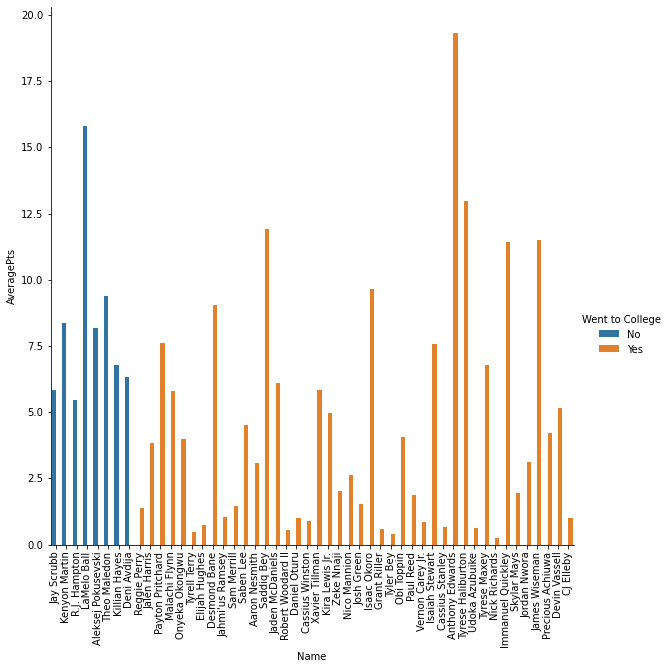

In [468]:
#now we can see the difference between players that went to college and those who didn't with the hue
sb.catplot(x="Name",y="AveragePts",data= df.sort_values("Went to College"),hue="Went to College",kind="bar",height=8).set_xticklabels(rotation =90)

In [469]:
#had to manipulate averagemins to work with the plot
df["AverageMins"] = df["AverageMins"].apply(lambda x: x.replace(":","."))
df["AverageMins"] = pd.to_numeric(df["AverageMins"])


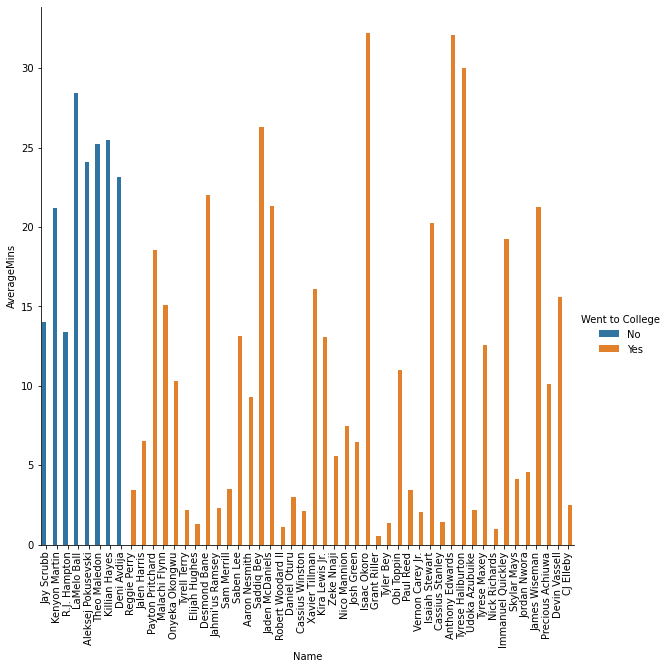

In [470]:
sb.catplot(x="Name",y="AverageMins",data= df.sort_values("Went to College"),hue="Went to College",kind="bar",height=8).set_xticklabels(rotation =90)

In [ ]:
#I noticed from these two graphs that the players that didn't go to college had higher averages
#for points and minutes than players coming from colleges their rookie season.
#I am curious to see if this is specific for this season, or if this is a trend across multiple years

#To find this out I am going to do the same analysis for 2016 and 2010 and see 
#if the average minutes and points are higher for non-college students in these years too.

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
14,acyqu01,"October 6, 1990","Tyler, Texas",0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3,Baylor University,37th overall,2nd round,Toronto Raptors,2012,6-7,"Mesquite Horn in Mesquite, Texas",Quincy Acy,Power Forward and Small Forward,Right,240lb
41,aldemfu01,"August 9, 1991","Konak, Turkey",0.7,51.3,0.0,48.1,41,12.0,2.3,4.3,1.4,51.3,NaN,53rd overall,2nd round,Los Angeles Clippers,2012,6-10,NaN,Furkan Aldemir,Power Forward,Right,240lb
209,barneha02,"May 30, 1992","Ames, Iowa",1.5,44.6,37.4,79.5,540,13.3,13.6,4.9,29.7,50.0,University of North Carolina,7th overall,1st round,Golden State Warriors,2012,6-8,"Ames in Ames, Iowa",Harrison Barnes,Power Forward and Small Forward,Right,225lb
234,bartowi01,"January 6, 1991","Baltimore, Maryland",2.4,43.1,34.1,78.8,438,14.4,10.5,3.9,16.4,48.9,University of Memphis,40th overall,2nd round,Portland Trail Blazers,2012,6-6,"Brewster Academy in Wolfeboro, New Hampshire",Will Barton,Shooting Guard,Right,190lb
262,bealbr01,"June 28, 1993","St. Louis, Missouri",3.7,45.2,38.4,79.8,488,17.1,19.8,3.9,36.4,51.9,University of Florida,3rd overall,1st round,Washington Wizards,2012,6-5,Chaminade College Preparatory School in St. Lo...,Bradley Beal,Shooting Guard,Right,207lb
879,crowdja01,"July 6, 1990","Villa Rica, Georgia",1.4,42.3,33.9,77.8,543,13.0,9.5,3.9,28.7,51.1,Marquette University,34th overall,2nd round,Cleveland Cavaliers,2012,6-6,"Villa Rica in Villa Rica, Georgia",Jae Crowder,Small Forward,Right,235lb
887,cunnija01,"May 22, 1991","Oakland, California",0.5,34.7,30.6,67.4,84,6.8,2.3,0.7,0.2,40.2,Oregon State University,24th overall,1st round,Cleveland Cavaliers,2012,6-4,"San Leandro in San Leandro, California",Jared Cunningham,Shooting Guard,Right,195lb
932,davisan02,"March 11, 1993","Chicago, Illinois",2.1,51.7,31.4,79.5,466,27.4,23.7,10.5,72.0,52.8,University of Kentucky,1st overall,1st round,New Orleans Hornets,2012,6-10,"Perspectives Charter School in Chicago, Illinois",Anthony Davis,Power Forward and Center,Right,253lb
1100,drumman01,"August 10, 1993","Mount Vernon, New York",1.2,54.3,14.7,44.8,542,22.1,14.1,13.7,56.4,54.4,University of Connecticut,9th overall,1st round,Detroit Pistons,2012,6-11,"St. Thomas More School in Oakdale, Connecticut",Andre Drummond,Center,Right,279lb
1207,engliki01,"September 24, 1988","Baltimore, Maryland",0.6,37.5,28.0,72.4,41,7.9,2.9,0.9,0.2,43.8,University of Missouri,44th overall,2nd round,Detroit Pistons,2012,6-6,"Notre Dame Preparatory School in Fitchburg, Ma...",Kim English,Shooting Guard,Right,200lb


In [855]:
#Using the players.csv file I can make a dataframe of the draft players and their college
#I'm Doing something very similar to above just using a different year
#I tried to make it all one function where you input a year, but the API recieves too many 
#requests at once so i had to split it up.
#When running this you might get an error saying expecting value, that just means the API needs time to
#chill and then you can run it again
allSeasonsDF = pd.read_csv("players.csv")
allSeasonsDF.fillna("none")
year = "2016"
yearQuery = allSeasonsDF.query("draft_year == @year")




In [856]:
#Same as before, get the IDs from a request
lastNames = []
for name in yearQuery["name"]:
    lastNames.append(name.split(" "))

idList = []
for name in lastNames:
    playerIDRequest = requests.get("https://www.balldontlie.io/api/v1/players?search=" + name[1]).json()
    for i in playerIDRequest["data"]:
        if(i["first_name"] == name[0]):
            idList.append(i["id"])


In [857]:
#used IDs to make another request and got each players season averages
#this time I made a list called noDataIds to hold the ids of players that have no data for them
playerStats = []
noDataIds = []
for id_ in idList:
    seasonAvgRe = requests.get("https://www.balldontlie.io/api/v1/season_averages?season="+year+"&player_ids[]="+str(id_)).json()
    if(seasonAvgRe["data"] == []):
        noDataIds.append(id_)
    else:
        averages = [seasonAvgRe["data"][0]["min"],seasonAvgRe["data"][0]["pts"]]
        playerStats.append(averages)
statsNBlanks = [playerStats, noDataIds]
statsNBlanks

[[['12:16', 3.21],
  ['7:29', 3.77],
  ['9:45', 2.66],
  ['13:20', 3.4],
  ['3:17', 0.0],
  ['4:22', 1.83],
  ['26:25', 10.23],
  ['21:15', 9.18],
  ['6:36', 1.61],
  ['11:41', 5.12],
  ['17:05', 3.76],
  ['7:41', 3.16],
  ['9:11', 3.95],
  ['3:30', 0.44],
  ['23:01', 10.56],
  ['28:51', 9.37],
  ['3:24', 2.0],
  ['18:32', 8.76],
  ['7:06', 2.23],
  ['21:41', 8.21],
  ['17:14', 6.45],
  ['9:51', 3.96],
  ['15:07', 3.97],
  ['8:27', 3.42],
  ['21:31', 9.89],
  ['4:01', 0.91],
  ['10:19', 2.8],
  ['16:08', 5.64],
  ['11:36', 3.06],
  ['9:00', 3.59],
  ['20:08', 5.91],
  ['15:37', 4.16],
  ['3:27', 1.43],
  ['18:24', 7.28],
  ['17:07', 5.11],
  ['16:38', 5.68],
  ['22:30', 7.44],
  ['5:40', 1.21],
  ['19:10', 5.45],
  ['16:00', 7.47]],
 [190, 260, 339, 2204, 384, 417, 466, 488, 492]]

In [858]:
#used the Ids in noDataIds to remove those names without data from the list of names
namesToRemove = []
for id_ in statsNBlanks[1]:
    nameReq = requests.get("https://www.balldontlie.io/api/v1/players/"+str(id_)).json()
    namesToRemove.append(nameReq["first_name"] +" "+  nameReq["last_name"])


In [1076]:
#new dictionary to hold all of the new information
cleanUpDictionary = {"Name":[],"College":[],"AverageMins":[],"AveragePts":[]}
for name in yearQuery["name"]:
    cleanUpDictionary["Name"].append(name)
for name in cleanUpDictionary["Name"]:
    if(name in namesToRemove):
        cleanUpDictionary["Name"].remove(name)
for name in cleanUpDictionary["Name"]:
    cleanUpDictionary["College"].append(yearQuery.loc[yearQuery.name == name,"college"])
for id_ in idList:
    if(id_ in statsNBlanks[1]):
        idList.remove(id_)
for mins in statsNBlanks[0]:
    cleanUpDictionary["AverageMins"].append(mins[0])
for pts in statsNBlanks[0]:
    cleanUpDictionary["AveragePts"].append(pts[1])
cleanUpDictionary["Name"] = cleanUpDictionary["Name"][:-5]
cleanUpDictionary["College"] = cleanUpDictionary["College"][:-5]
newDataFrame = pd.DataFrame(cleanUpDictionary)
newDataFrame


,Name,College,AverageMins,AveragePts
0,Wade Baldwin,"187 Vanderbilt University Name: college, dt...",12:16,3.21
1,Malik Beasley,"269 Florida State University Name: college,...",7:29,3.77
2,DeAndre' Bembry,291 Saint Joseph's University Name: college...,9:45,2.66
3,Dragan Bender,"294 NaN Name: college, dtype: object",13:20,3.40
4,Ben Bentil,"309 Providence College Name: college, dtype...",3:17,0.00
5,Joel Bolomboy,"383 Weber State University Name: college, d...",4:22,1.83
6,Malcolm Brogdon,"489 University of Virginia Name: college, d...",26:25,10.23
7,Jaylen Brown,"517 University of California Name: college,...",21:15,9.18
8,Marquese Chriss,"725 University of Washington Name: college,...",6:36,1.61
9,Deyonta Davis,944 Michigan State University Name: college...,11:41,5.12


In [961]:
#had to make colleges into strings
newDataFrame["College"] = newDataFrame["College"].apply(lambda x: x.to_string())
newDataFrame["College"] = newDataFrame["College"].apply(lambda x: x.replace("NaN", "None"))
newDataFrame["Went to College"] = newDataFrame["College"].apply(atCollege)


In [962]:
newDataFrame

,Name,College,AverageMins,AveragePts,Went to College
0,Wade Baldwin,187 Vanderbilt University,12:16,3.21,Yes
1,Malik Beasley,269 Florida State University,7:29,3.77,Yes
2,DeAndre' Bembry,291 Saint Joseph's University,9:45,2.66,Yes
3,Dragan Bender,294 None,13:20,3.40,Yes
4,Ben Bentil,309 Providence College,3:17,0.00,Yes
5,Joel Bolomboy,383 Weber State University,4:22,1.83,Yes
6,Malcolm Brogdon,489 University of Virginia,26:25,10.23,Yes
7,Jaylen Brown,517 University of California,21:15,9.18,Yes
8,Marquese Chriss,725 University of Washington,6:36,1.61,Yes
9,Deyonta Davis,944 Michigan State University,11:41,5.12,Yes


In [965]:
#got rid of numbers in front of college
newDataFrame["College"] = newDataFrame["College"].apply(lambda x: x[5:])


In [970]:
#made went to college column using apply and atCollege function
newDataFrame["College"] = newDataFrame["College"].apply(lambda x: x.rstrip())
newDataFrame["College"] = newDataFrame["College"].apply(lambda x: x.lstrip())
newDataFrame["Went to College"] = newDataFrame["College"].apply(atCollege)


ValueError: Unable to parse string "12:16" at position 0

In [971]:
#made AverageMins a numeric value for plotting
newDataFrame["AverageMins"] = newDataFrame["AverageMins"].apply(lambda x: x.replace(":","."))
newDataFrame["AverageMins"] = pd.to_numeric(newDataFrame["AverageMins"])

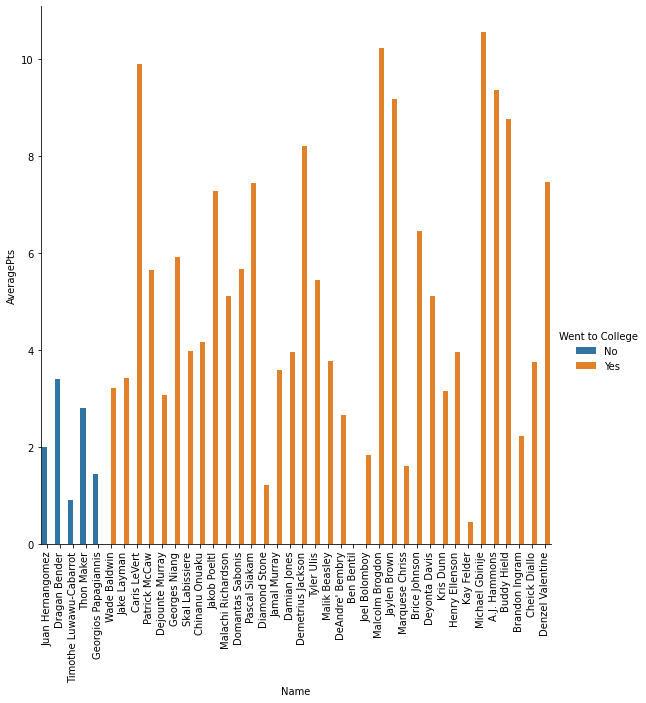

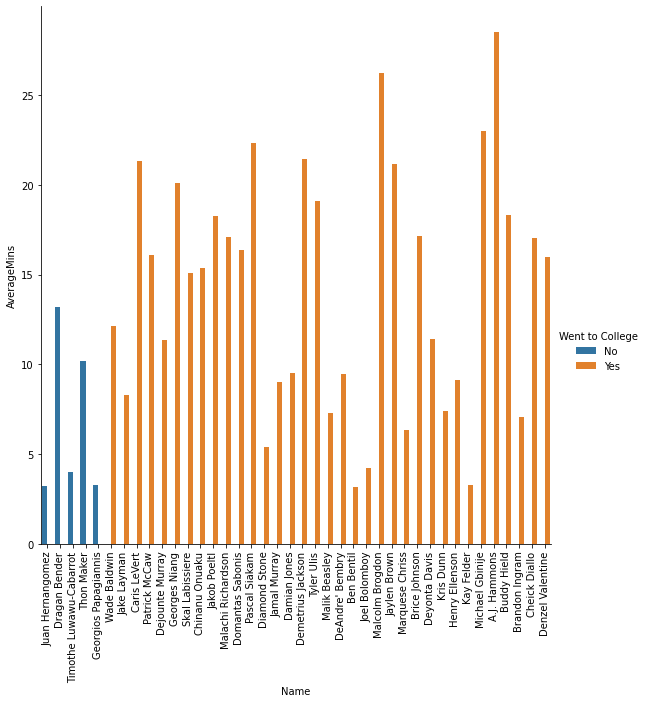

In [973]:
sb.catplot(x="Name",y="AveragePts",data= newDataFrame.sort_values("Went to College"),hue="Went to College",kind="bar",height=8).set_xticklabels(rotation =90)
sb.catplot(x="Name",y="AverageMins",data= newDataFrame.sort_values("Went to College"),hue="Went to College",kind="bar",height=8).set_xticklabels(rotation =90)

In [ ]:
#These graphs do not show the same trend for no college players. In these graphs the players that did
#not go to college look the same or worse than their collegiate counterparts.

In [984]:
#Now I want to see which Colleges are producing the most NBA players and if their programs produce more
#or less over the years. 

In [1078]:
query2015 = allSeasonsDF.query("draft_year >= '2015' & draft_year <= '2020'")

numPlayers2015 = pd.DataFrame(query2015["college"].value_counts().reset_index().values, columns = ["College","Players"])
numPlayers2015

,College,Players
0,University of Kentucky,16
1,Duke University,12
2,"University of California, Los Angeles",8
3,Villanova University,6
4,University of Kansas,6
...,...,...
70,Oklahoma State University,1
71,"University of Oregon, University of Houston",1
72,West Virginia University,1
73,Baylor University,1


In [1192]:
query2010 = allSeasonsDF.query("draft_year >= '2010' & draft_year <= '2020'")

numPlayers2010 = pd.DataFrame(query2010["college"].value_counts().reset_index().values, columns = ["College","Players"])
numPlayers2010

,College,Players
0,University of Kentucky,34
1,Duke University,20
2,University of Kansas,17
3,"University of California, Los Angeles",14
4,University of North Carolina,11
...,...,...
123,"Duke University, University of Memphis",1
124,Virginia Commonwealth University,1
125,University of Iowa,1
126,"University of Louisville, University of Texas ...",1


In [1186]:
query2005 = allSeasonsDF.query("draft_year >= '2000' & draft_year <= '2010'")

numPlayers2005 = pd.DataFrame(query2005["college"].value_counts().reset_index().values, columns = ["College","Players"])
numPlayers2005

,College,Players
0,"University of California, Los Angeles",15
1,University of North Carolina,13
2,University of Kansas,12
3,University of Connecticut,12
4,University of Texas at Austin,11
...,...,...
144,Providence College,1
145,"Baylor University, Mississippi State University",1
146,"Iowa State University, Syracuse University",1
147,"Midland College, University of North Dakota",1


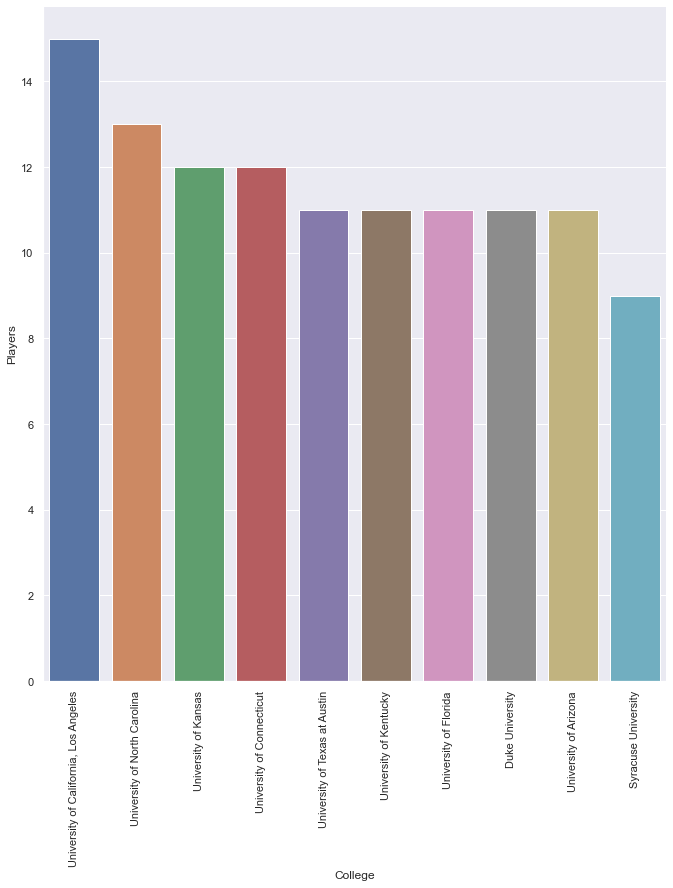

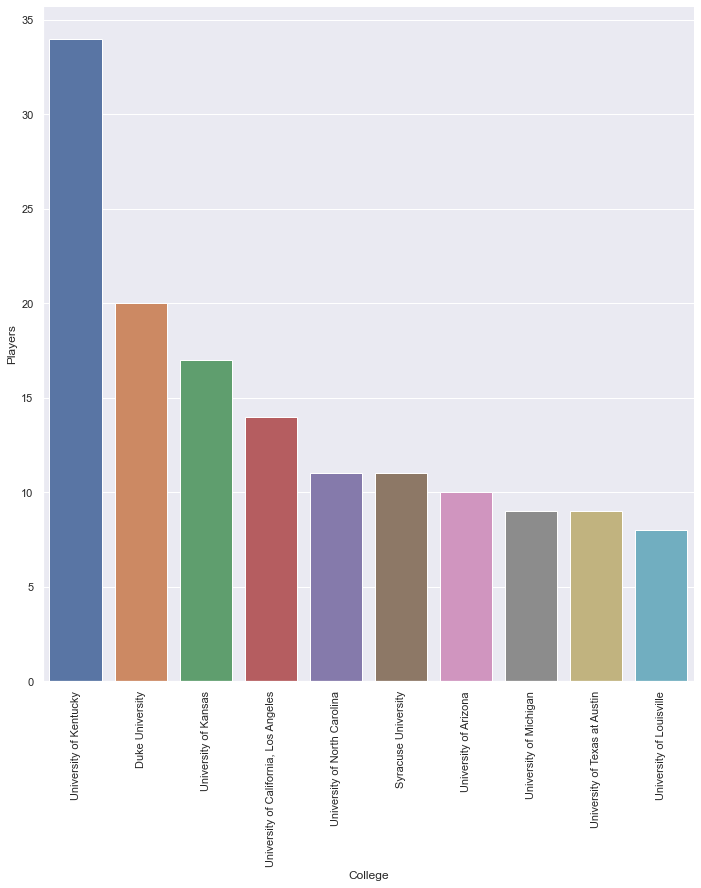

In [1193]:
sb.catplot(x="College", y="Players",data=numPlayers2005.query("Players > 1").head(10),kind="bar", height =10).set_xticklabels(rotation = 90)
sb.catplot(x="College", y="Players",data=numPlayers2010.query("Players > 1").head(10),kind="bar",height=10).set_xticklabels(rotation = 90)

In [1191]:
#From 2000-2010 UCLA, North Carolina, and Kansas had the most players drafted.
#and from 2010-2018 Kentucky, Duke, Kansas and had the most.
#These schools overall had the most college players, especially in recent years. 

In [ ]:
#I'm going to take the top 10 colleges from 2018 and see how they did in the last 10 years to see 
#if their programs have gotten better or worse over the years.

In [1113]:
top102010 = allSeasonsDF.query("draft_year == '2018'")
valueCounts2010 = pd.DataFrame(top102010["college"].value_counts().reset_index().values, columns = ["College","Players"])
valueCounts2010.head(10).loc[valueCounts2010.College == "University of Kentucky","Players"].to_string().replace(" ","").replace("0","")

'4'

In [1196]:
#list of top 10 colleges that had players in 2018 draft
orderedCollegeList = ['University of Kentucky',
  'Villanova University',
  'Duke University',
  'University of California, Los Angeles',
  'Michigan State University',
  'University of Miami',
  'University of Kansas',
  'University of Southern California',
  'Boise State University',
  'Boston College']
#dictionary for data
collegePlayerCount = {"College":[],"Year":[],"Players":[]}
#added colleges for every year
for j in range(0,9):
    for college in valueCounts2010["College"].head(10):
        collegePlayerCount["College"].append(college)
#adding years to the dictionary
for year in range(2010,2019):
    for i in range(0,10):
        collegePlayerCount["Year"].append(year)
#getting player counts for each college for each year
for year in range(2010,2019):
    year = str(year)
    #query each year
    query = allSeasonsDF.query("draft_year == @year")
    #value counts for players for each year
    valueCountsPerYear = pd.DataFrame(query["college"].value_counts().reset_index().values, columns = ["College","Players"])
    #get value for each college and add to dict
    for college in orderedCollegeList:
        playerCount = valueCountsPerYear.loc[valueCountsPerYear.College == college,"Players"].to_string().replace(" ","").replace("0","")
        #handling data with 0 players
        noDataStr = "Series([],)"
        if(playerCount == noDataStr):
            playerCount = "0"
        collegePlayerCount["Players"].append(playerCount)
        
collegePlayerCount

{'College': ['University of Kentucky',
  'Villanova University',
  'Duke University',
  'University of California, Los Angeles',
  'Michigan State University',
  'University of Miami',
  'University of Kansas',
  'University of Southern California',
  'Boise State University',
  'Boston College',
  'University of Kentucky',
  'Villanova University',
  'Duke University',
  'University of California, Los Angeles',
  'Michigan State University',
  'University of Miami',
  'University of Kansas',
  'University of Southern California',
  'Boise State University',
  'Boston College',
  'University of Kentucky',
  'Villanova University',
  'Duke University',
  'University of California, Los Angeles',
  'Michigan State University',
  'University of Miami',
  'University of Kansas',
  'University of Southern California',
  'Boise State University',
  'Boston College',
  'University of Kentucky',
  'Villanova University',
  'Duke University',
  'University of California, Los Angeles',
  'Michiga

In [1197]:
playersOverTheYearsDF = pd.DataFrame(collegePlayerCount)
playersOverTheYearsDF["Players"] = pd.to_numeric(playersOverTheYearsDF["Players"])

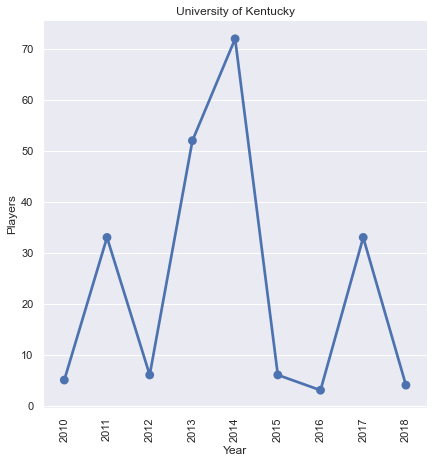

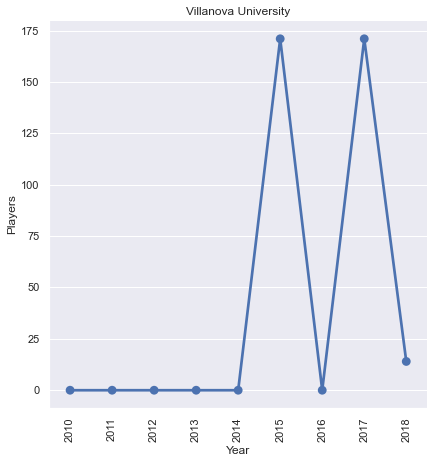

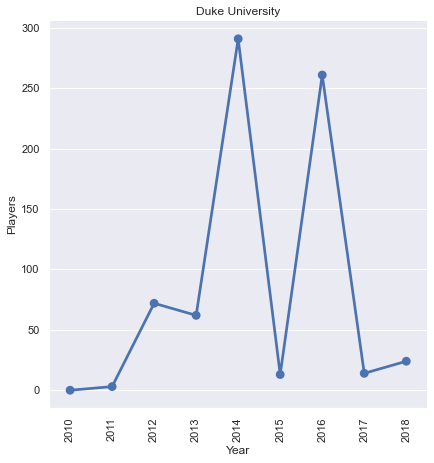

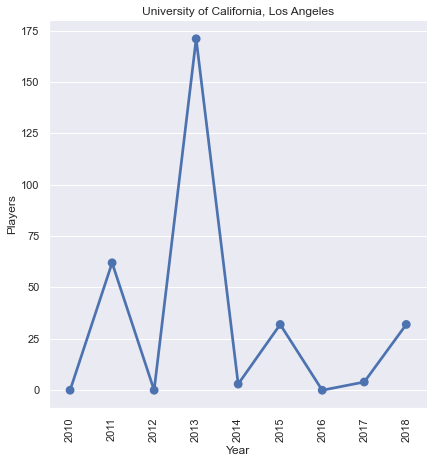

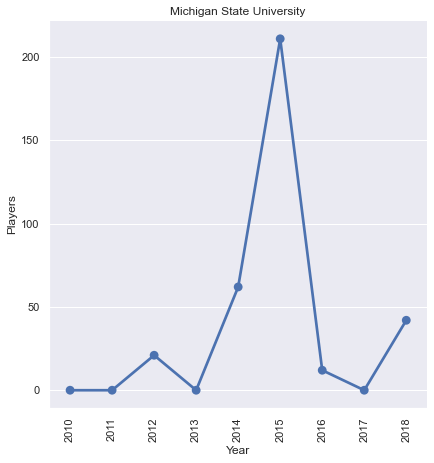

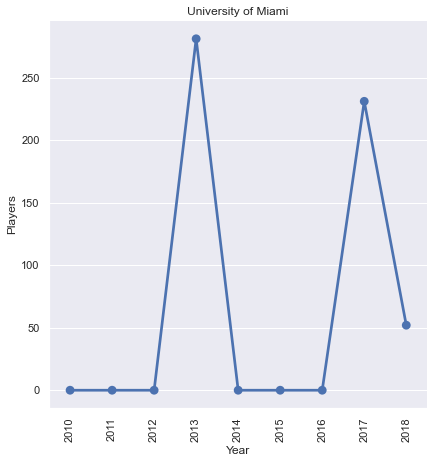

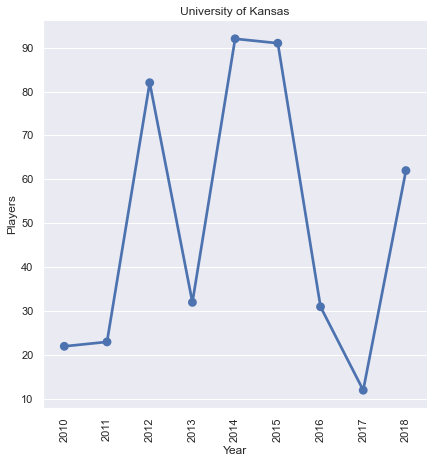

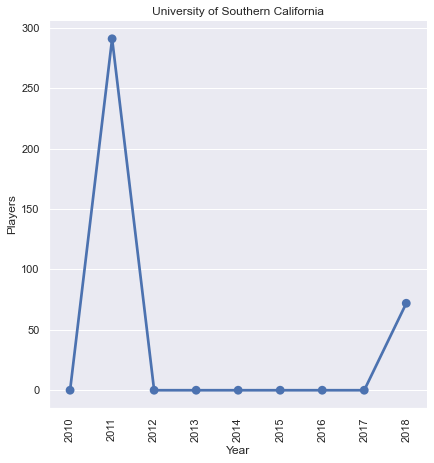

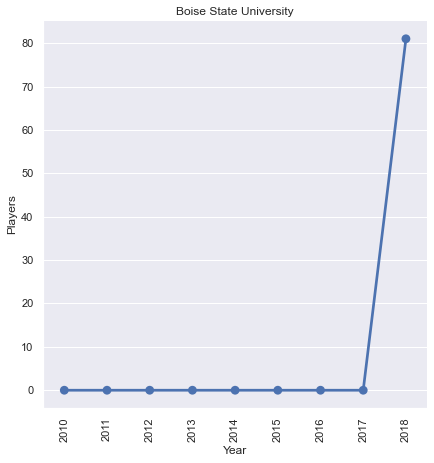

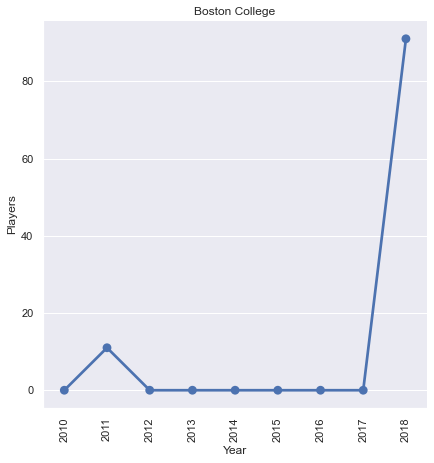

In [1182]:
#plot graphs for each top 10 school to see over the years
for college in orderedCollegeList:
    query1 = playersOverTheYearsDF.sort_values('Players', ascending = True).query("College == @college").reset_index()
    Plot = sb.catplot(x="Year",y="Players",data=query1
                       ,kind="point",height=6).set_xticklabels(rotation=90).set(title=college)
                                    

In [ ]:
#What I gathered from these graphs is that the top 10 teams from 2018 have had ups and downs over the
#past 8 years. There has not been a consistent amount of players being drafted from any college 
#every year. The colleges that stand out are Kentucky, Villanova, Duke, Kansas, and UCLA. 
#Being a player at one of these colleges gives you a better chance of being drafted based on the data.